<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/ConversionRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep=';')

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Add conversion column where y column value yes => 1 else no => 0.
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
#Aggregate Conversion Rate - conversion rate is the % of customers that subscribed to a term deposit.
# count all the # of customers in each group and dividing it by the total of customers in the dataset.
conversion_rate_df = pd.DataFrame(df.groupby('conversion').count()['y'] / df.shape[0] *100)
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [ ]:
# Transpose the df by using the T attribute
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


In [ ]:
#Aggregate Conversion Rate - conversion rate
print('total conversion: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversion: 5289 out of 45211


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100))

conversion rate: 11.70%


In [ ]:
# conversion rate by job
conversions_by_job = df.groupby(by='job')['conversion'].sum() / df.groupby(by='job')['conversion'].count() * 100.0
conversions_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

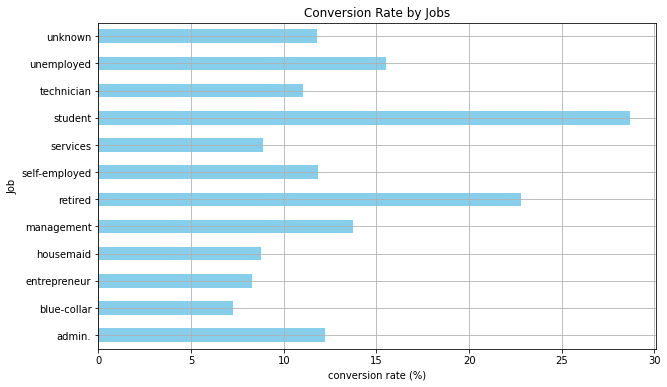

In [ ]:
ax = conversions_by_job.plot(kind = 'barh', color = 'skyblue', grid=True, figsize=(10,6),title = 'Conversion Rate by Jobs')
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

In [ ]:
# Default rates by conversions
# using len as the aggregation function, we can count how many customers fall under each cell of the pivot table
default_by_conversion_df = pd.pivot_table(df, values='y', index='default', columns='conversion', aggfunc=len)

In [ ]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


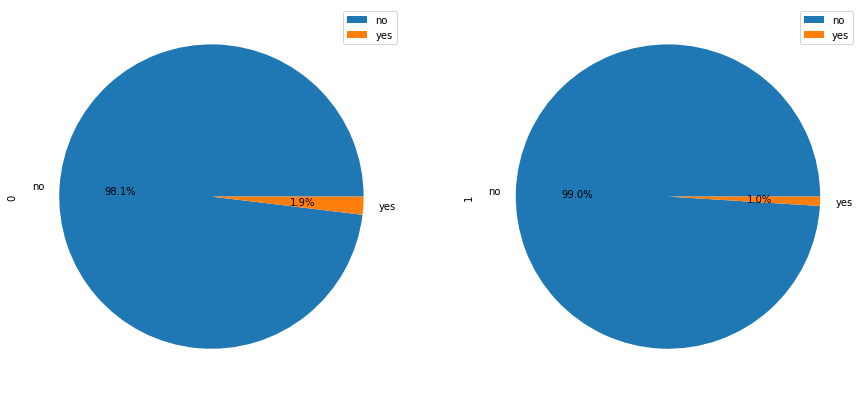

In [ ]:
default_by_conversion_df.plot(kind='pie', figsize=(15,7), subplots=True, autopct=lambda x: '%0.1f%%' % x)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


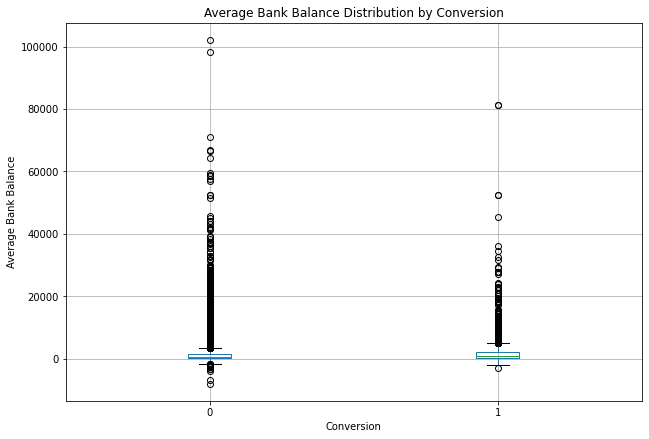

In [ ]:
# Bank balances by conversions
# find differences in the distributions of bank balances between the conversion vs. non-conversion groups.
ax = df[['conversion', 'balance']].boxplot(by='conversion', showfliers=True, figsize=(10,7))
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distribution by Conversion')
plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


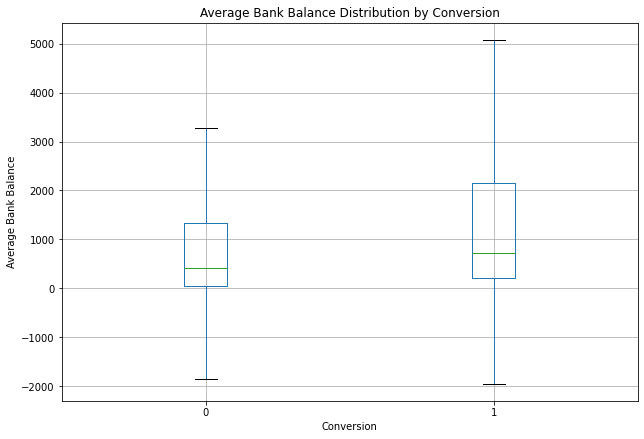

In [ ]:
# find differences in the distributions of bank balances between the conversion vs. non-conversion groups. WITHOUT OUTLIERS
ax = df[['conversion', 'balance']].boxplot(by='conversion', showfliers=False, figsize=(10,7))
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distribution by Conversion')
plt.suptitle("")
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'conversion'],
      dtype='object')

In [ ]:
# conversion rate by numbers of contacts
conversions_by_num_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count() * 100.0
conversions_by_num_contacts.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: conversion, dtype: float64

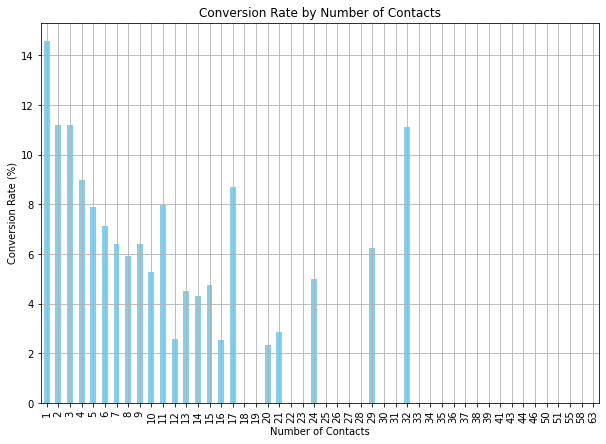

In [ ]:
# display this in bar chart
ax = conversions_by_num_contacts.plot(kind = 'bar', color = 'skyblue', grid=True, figsize=(10,7),title = 'Conversion Rate by Number of Contacts')
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

There are some noises in a higher numbers of contacts, as the sample size is smaller for them, but we can easily see the overall downward trend in this bar chart. As the # of contacts increase, the conversion rates slowly decrease.

In [ ]:
# conversion rate by numbers of contact
pd.DataFrame(df.groupby(by='campaign')['conversion'].sum())

,conversion
campaign,
1,2561
2,1401
3,618
4,317
5,139
6,92
7,47
8,32
9,21


In [ ]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].count())

,conversion
campaign,
1,17544
2,12505
3,5521
4,3522
5,1764
6,1291
7,735
8,540
9,327


In [ ]:
conversion_by_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count()*100

In [ ]:
pd.DataFrame(conversion_by_contacts)
conversion_by_contacts.T

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

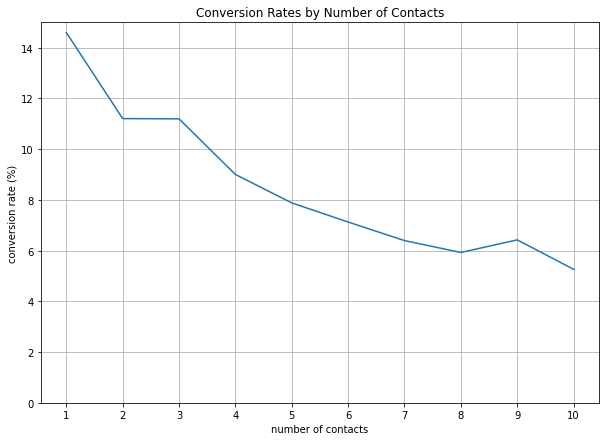

In [ ]:
ax = conversion_by_contacts[:10].plot(
    grid = True,
    figsize=(10, 7),
    xticks=conversion_by_contacts.index[:10],
    title = 'Conversion Rates by Number of Contacts'
)
ax.set_ylim([0,15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [ ]:
# conversion rate by age - sum
pd.DataFrame(df.groupby(by='age')['conversion'].sum())

,conversion
age,
18,7
19,11
20,15
21,22
22,40
...,...
90,2
92,2
93,2


In [ ]:
# conversion rate by age - count
pd.DataFrame(df.groupby(by='age')['conversion'].count())

,conversion
age,
18,12
19,35
20,50
21,79
22,129
...,...
90,2
92,2
93,2


In [ ]:
conversions_by_age = df.groupby(by='age')['conversion'].sum() / df.groupby(by='age')['conversion'].count() * 100.0

In [ ]:
conversions_by_age.T

age
18     58.333333
19     31.428571
20     30.000000
21     27.848101
22     31.007752
         ...    
90    100.000000
92    100.000000
93    100.000000
94      0.000000
95     50.000000
Name: conversion, Length: 77, dtype: float64

In [ ]:
pd.DataFrame(conversions_by_age)

,conversion
age,
18,58.333333
19,31.428571
20,30.000000
21,27.848101
22,31.007752
...,...
90,100.000000
92,100.000000
93,100.000000


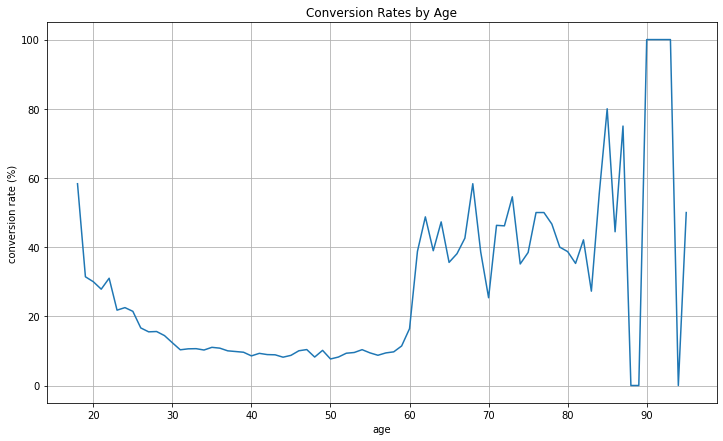

In [ ]:
ax = conversions_by_age.plot(grid=True, figsize=(12, 7), title='Conversion Rates by Age')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [ ]:
# AGE GROUP
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,"[50, 60)"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,"[40, 50)"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,"[30, 40)"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,"[40, 50)"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,"[30, 40)"


In [ ]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].sum())

,conversion
age_group,
70+,235
"[18, 30)",928
"[30, 40)",1913
"[40, 50)",1063
"[50, 60)",785
"[60, 70)",365


In [ ]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].count())

,conversion
age_group,
70+,554
"[18, 30)",5273
"[30, 40)",18089
"[40, 50)",11655
"[50, 60)",8410
"[60, 70)",1230


In [ ]:
conversions_by_age_group = df.groupby(by='age_group')['conversion'].sum() / df.groupby(by='age_group')['conversion'].count() * 100.0

In [ ]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,42.418773
"[18, 30)",17.599090
"[30, 40)",10.575488
"[40, 50)",9.120549
"[50, 60)",9.334126
"[60, 70)",29.674797


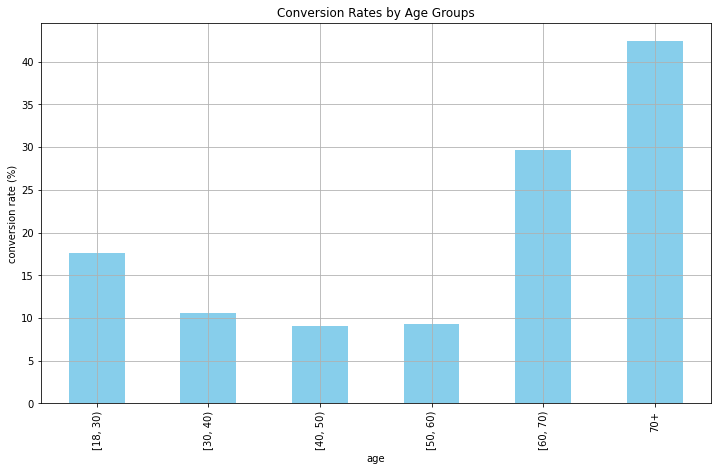

In [ ]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(12, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

CONVERSION VS. NON CONVERSION

In [ ]:
# by Marital Status
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [ ]:
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


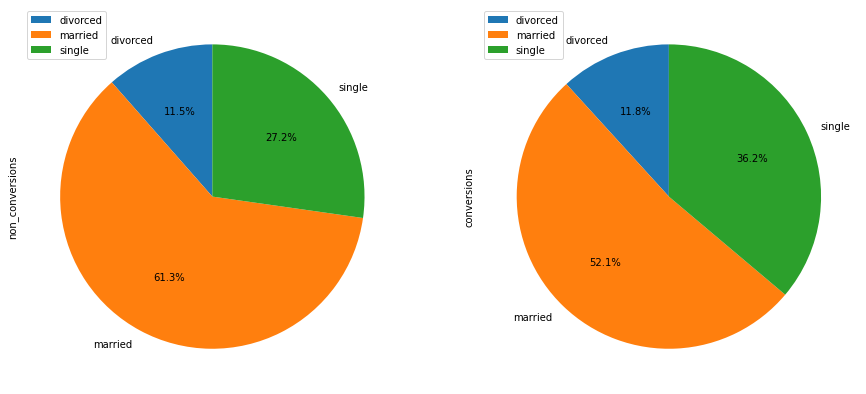

In [ ]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [ ]:
# by education
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df

conversion,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [ ]:
conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


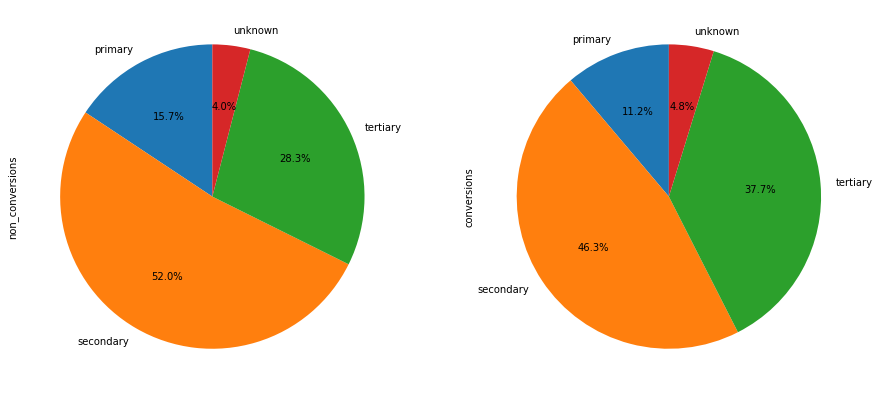

In [ ]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

In [ ]:
# Last Contact Duration
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
1,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


In [ ]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True),
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['conversions', 'non_conversions']

duration_df = duration_df / (60*60)

In [ ]:
duration_df

,conversions,non_conversions
0,0.289444,0.072500
1,0.407500,0.041944
2,0.385833,0.021111
3,0.160833,0.025556
4,0.186944,0.055000
...,...,...
39917,NaN,0.045000
39918,NaN,0.092500
39919,NaN,0.323889
39920,NaN,0.141111


In [ ]:
duration_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,39882,39883,39884,39885,39886,39887,39888,39889,39890,39891,39892,39893,39894,39895,39896,39897,39898,39899,39900,39901,39902,39903,39904,39905,39906,39907,39908,39909,39910,39911,39912,39913,39914,39915,39916,39917,39918,39919,39920,39921
conversions,0.289444,0.407500,0.385833,0.160833,0.186944,0.156111,0.333611,0.286111,0.450833,0.168889,0.465833,0.255000,0.360278,0.195278,0.443611,0.203333,0.316111,0.164167,0.218333,0.437222,0.469167,0.306111,0.261944,0.225833,0.301111,0.150278,0.310833,0.311111,0.142500,0.122778,0.2100,0.579722,0.311111,0.273611,0.171389,0.134167,0.214444,0.258056,0.149444,0.197222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_conversions,0.072500,0.041944,0.021111,0.025556,0.055000,0.038611,0.060278,0.105556,0.013889,0.015278,0.061667,0.038056,0.143611,0.019722,0.048333,0.098056,0.027222,0.010556,0.060833,0.015000,0.072778,0.045556,0.044444,0.095000,0.050278,0.047778,0.082222,0.035278,0.070833,0.096667,0.0625,0.063889,0.057778,0.062778,0.093333,0.067222,0.101389,0.462778,0.160278,0.038056,...,0.019722,0.005,0.048889,0.066667,0.0575,0.033333,0.038056,0.140833,0.029444,0.041111,0.058889,0.098333,0.070833,0.093056,0.090556,0.083611,0.166667,0.034722,0.026111,0.105278,0.030833,0.129167,0.063333,0.050556,0.027222,0.061944,0.037222,0.032778,0.088611,0.115,0.020556,0.021667,0.038333,0.077778,0.048056,0.045,0.0925,0.323889,0.141111,0.100278


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


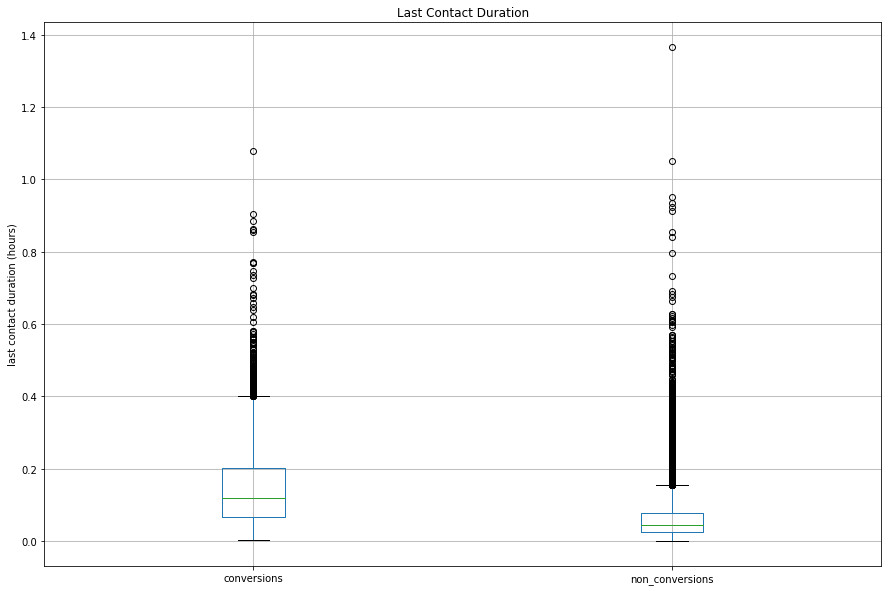

In [ ]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(15, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

CONVERSIONS BY AGE GROUP AND MARITAL STATUS

In [ ]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

In [ ]:
age_marital_df = age_marital_df.divide(df.groupby(by='age_group')['conversion'].count(), axis=0)

In [ ]:
age_marital_df

marital,divorced,married,single
age_group,,,
70+,0.099278,0.319495,0.005415
"[18, 30)",0.002086,0.023326,0.150578
"[30, 40)",0.008735,0.050473,0.046548
"[40, 50)",0.015015,0.058172,0.018018
"[50, 60)",0.019025,0.068014,0.006302
"[60, 70)",0.051220,0.237398,0.008130


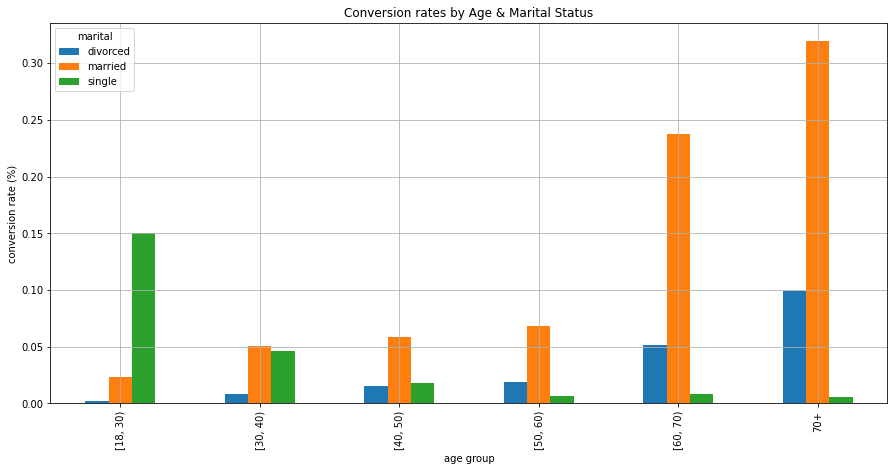

In [ ]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    grid=True,
    figsize=(15,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

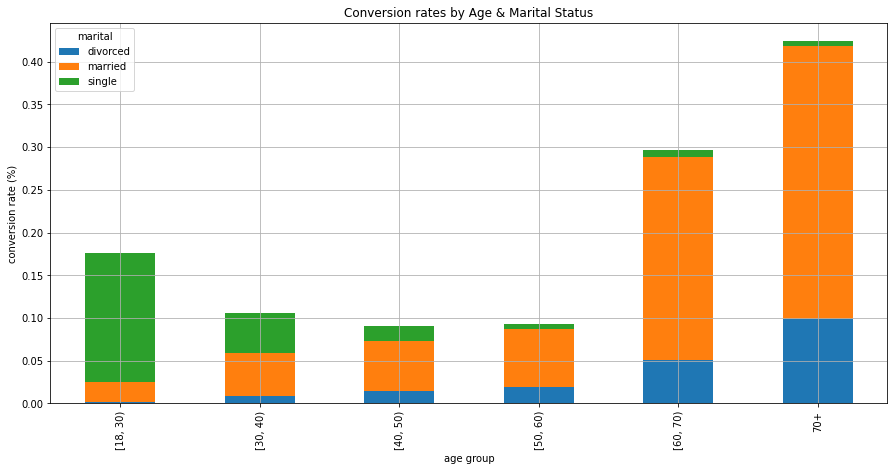

In [ ]:

ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    stacked=True,
    grid=True,
    figsize=(15,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()